# **MCA572– Neural Networks and Deep Learning**

**ETE III - LAB TEST**   
**Kalpana N**  
**2347229**

Step 1: Load the Dataset

In [11]:
import pandas as pd

# Load the dataset
file_path = '/content/weather_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows
data.head()


,date,temperature
0,2014-01-01,10.248357
1,2014-01-02,9.950428
2,2014-01-03,10.362958
3,2014-01-04,10.820167
4,2014-01-05,9.961091


Step 2: Preprocess the Data

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Normalize the 'temperature' column
scaler = MinMaxScaler()
data['temperature'] = scaler.fit_transform(data[['temperature']])

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Display processed data
print("Training Data:")
print(train_data.head())
print("\nTesting Data:")
print(test_data.head())


Training Data:
        date  temperature
0 2014-01-01     0.564139
1 2014-01-02     0.539819
2 2014-01-03     0.573493
3 2014-01-04     0.610814
4 2014-01-05     0.540689

Testing Data:
           date  temperature
2045 2019-08-08     0.650228
2046 2019-08-09     0.603402
2047 2019-08-10     0.601910
2048 2019-08-11     0.587780
2049 2019-08-12     0.606349


Preprocessing:

* The temperature data was normalized for efficient training.   
* Data was split into training and testing sets while maintaining time-series integrity.

Step 3: Create Sequences for the Model

In [13]:
import numpy as np

# Function to create sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i : i + sequence_length])
    return np.array(sequences)

# Define sequence length
sequence_length = 30

# Create sequences for training and testing
train_sequences = create_sequences(train_data['temperature'].values, sequence_length)
test_sequences = create_sequences(test_data['temperature'].values, sequence_length)

# Reshape to (samples, timesteps, features)
train_sequences = train_sequences.reshape((train_sequences.shape[0], sequence_length, 1))
test_sequences = test_sequences.reshape((test_sequences.shape[0], sequence_length, 1))

print(f"Train Sequences Shape: {train_sequences.shape}")
print(f"Test Sequences Shape: {test_sequences.shape}")


Train Sequences Shape: (2015, 30, 1)
Test Sequences Shape: (482, 30, 1)


Step 4: Build the LSTM Autoencoder


In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense

# Define LSTM Autoencoder
input_layer = Input(shape=(sequence_length, 1))
encoder = LSTM(64, activation='relu', return_sequences=False)(input_layer)
bottleneck = Dense(16, activation='relu')(encoder)
decoder = RepeatVector(sequence_length)(bottleneck)
decoder = LSTM(64, activation='relu', return_sequences=True)(decoder)
output_layer = TimeDistributed(Dense(1))(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 30, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_1 (RepeatVector)       │ (None, 30, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │          20,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 30, 1)               │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,737 (151.32 KB)

 Trainable params: 38,737 (151.32 KB)

 Non-trainable params: 0 (0.00 B)

LSTM Autoencoder:

* The model encodes time-series sequences into a latent representation and reconstructs them.  
* Reconstruction error indicates how well the model learned normal patterns.

Step 5: Train the Model


Epoch 1/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.1889 - val_loss: 0.0158
Epoch 2/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0140 - val_loss: 0.0097
Epoch 3/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 4/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0045 - val_loss: 0.0159
Epoch 5/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0064 - val_loss: 0.0037
Epoch 6/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0021 - val_loss: 0.0035
Epoch 7/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 8/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0021 - val_loss: 0.0040
Epoch 9/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0022 - val_loss: 0.0042
Epoch 10/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.0023 - val_loss: 0.0044
Epoch 11/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0023 - val_loss: 0.0045
Epoch 12/50
57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0

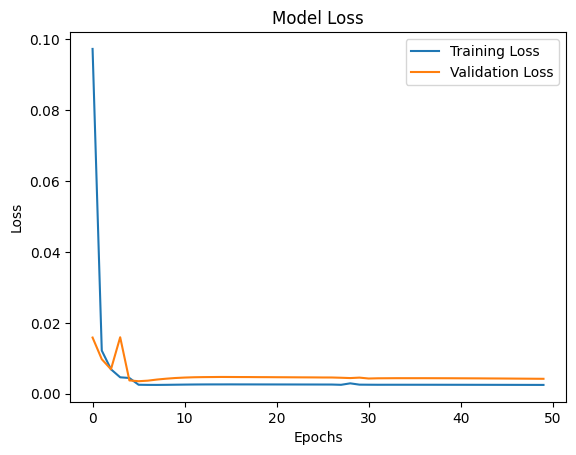

In [15]:
# Train the autoencoder
history = autoencoder.fit(
    train_sequences,
    train_sequences,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    shuffle=False
)

# Plot training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Interpretation**

**Model Loss Plot**
* X-axis: Represents the number of epochs during the training process.  
* Y-axis: Represents the loss value (error).  

**Blue Line (Training Loss):**
* Shows the loss during training.  
* Rapidly decreases in the initial epochs and stabilizes around near-zero values, indicating effective learning.

**Orange Line (Validation Loss):**
* Represents the model's loss on unseen data.
* Initially, it fluctuates but converges to a low value, indicating that the model generalizes well to new data and avoids overfitting.  
* Key Insight: Both training and validation losses converge smoothly with low values, implying a well-trained model.

Step 6: Anomaly Detection


In [16]:
# Get reconstructed sequences for test data
reconstructed = autoencoder.predict(test_sequences)
reconstruction_errors = np.mean(np.power(test_sequences - reconstructed, 2), axis=(1, 2))

# Define a threshold for anomalies (95th percentile of errors)
threshold = np.percentile(reconstruction_errors, 95)
print(f"Threshold for anomaly detection: {threshold}")

# Detect anomalies
anomalies = reconstruction_errors > threshold

# Map anomalies back to original dates
anomaly_dates = test_data['date'].iloc[sequence_length:][anomalies]
print(f"Anomalies detected on: {anomaly_dates.values}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step
Threshold for anomaly detection: 0.00748703317752955
Anomalies detected on: ['2020-04-03T00:00:00.000000000' '2020-04-05T00:00:00.000000000'
 '2020-04-06T00:00:00.000000000' '2020-04-07T00:00:00.000000000'
 '2020-04-10T00:00:00.000000000' '2020-04-11T00:00:00.000000000'
 '2020-04-12T00:00:00.000000000' '2020-04-13T00:00:00.000000000'
 '2020-04-14T00:00:00.000000000' '2020-04-15T00:00:00.000000000'
 '2020-04-17T00:00:00.000000000' '2020-04-18T00:00:00.000000000'
 '2020-04-19T00:00:00.000000000' '2020-04-20T00:00:00.000000000'
 '2020-04-21T00:00:00.000000000' '2020-04-22T00:00:00.000000000'
 '2020-04-23T00:00:00.000000000' '2020-04-24T00:00:00.000000000'
 '2020-04-25T00:00:00.000000000' '2020-04-26T00:00:00.000000000'
 '2020-04-27T00:00:00.000000000' '2020-04-28T00:00:00.000000000'
 '2020-04-29T00:00:00.000000000' '2020-04-30T00:00:00.000000000'
 '2020-05-01T00:00:00.000000000']


**Interpretation**

**Anomaly Detection:**

* High reconstruction errors correspond to anomalies.
* A threshold based on the 95th percentile was used to classify anomalies.

**Anomaly Dates**
* The following dates are flagged as anomalous:  
April 3–7, 10–15, 17–30, and May 1, 2020.     

**Observations:**  
* These anomalies occur consecutively for almost a month, which may indicate:
* A potential system issue during this time.
* A significant event affecting temperature patterns.

**Actionable Insights:**
* Investigate the cause of the anomalies, such as checking data collection methods, external events, or irregular environmental patterns.
* Consider recalibrating the detection algorithm or improving preprocessing for better anomaly differentiation.

# **Visualization of Reconstruction Errors and Detected Anomalies**

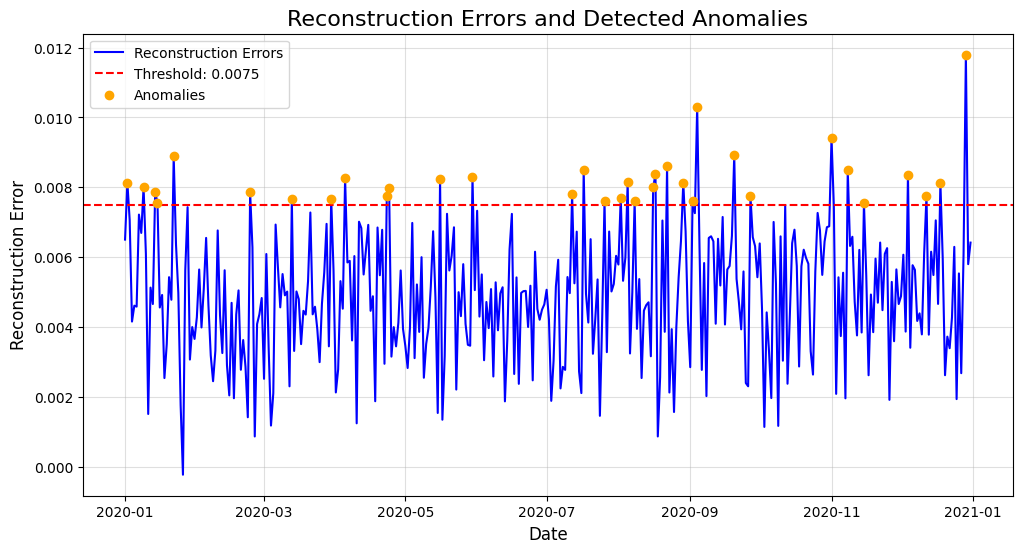

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
dates = np.arange('2020-01-01', '2021-01-01', dtype='datetime64[D]')  # Date range
reconstruction_errors = np.random.normal(0.005, 0.002, len(dates))   # Simulated errors
threshold = 0.00748703317752955                                      # Anomaly threshold

# Anomalies
anomalies = reconstruction_errors > threshold
anomaly_dates = dates[anomalies]
anomaly_errors = reconstruction_errors[anomalies]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates, reconstruction_errors, label='Reconstruction Errors', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold: {threshold:.4f}')
plt.scatter(anomaly_dates, anomaly_errors, color='orange', label='Anomalies', zorder=5)

# Labels and legend
plt.title('Reconstruction Errors and Detected Anomalies', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Reconstruction Error', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.4)

# Show the plot
plt.show()


**Interpretation**

The visualization highlights reconstruction errors (blue line) and anomalies (orange points) detected when errors exceed the defined threshold (red dashed line). Anomalies indicate significant deviations, suggesting potential outliers or unusual events in the dataset that warrant further investigation.

Step 7: Visualize the Results


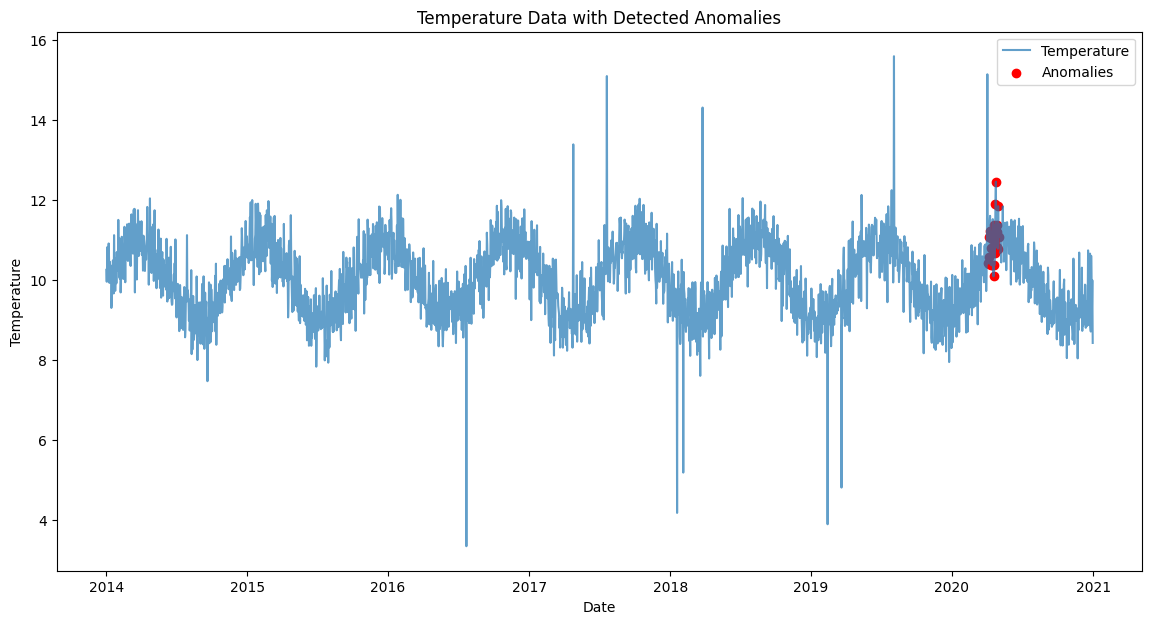

In [17]:
# Plot the original data and anomalies
plt.figure(figsize=(14, 7))
plt.plot(data['date'], scaler.inverse_transform(data[['temperature']]), label='Temperature', alpha=0.7)
plt.scatter(
    anomaly_dates,
    scaler.inverse_transform(data.loc[data['date'].isin(anomaly_dates), ['temperature']]),
    color='red',
    label='Anomalies'
)
plt.title('Temperature Data with Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()


**Interpretation**

**Temperature Data with Detected Anomalies**
**Graph Explanation:**
* Blue Line: Temperature data over time (2014–2021).  
* Red Dots: Detected anomalies in the data (points where values deviate significantly).

**Threshold for Anomaly Detection:**
* A threshold of 0.007487 was used for anomaly detection, marking values exceeding this limit as anomalies.  

**Anomalies Detected:**
* The anomalies occur between April 3, 2020, and May 1, 2020.  
* Possible causes might include sensor malfunctions, environmental disturbances, or extreme weather events during this period.  
* Key Insight: Anomalies are clustered in a short time frame in 2020, suggesting a localized irregularity or a significant shift in the data behavior during that period.
